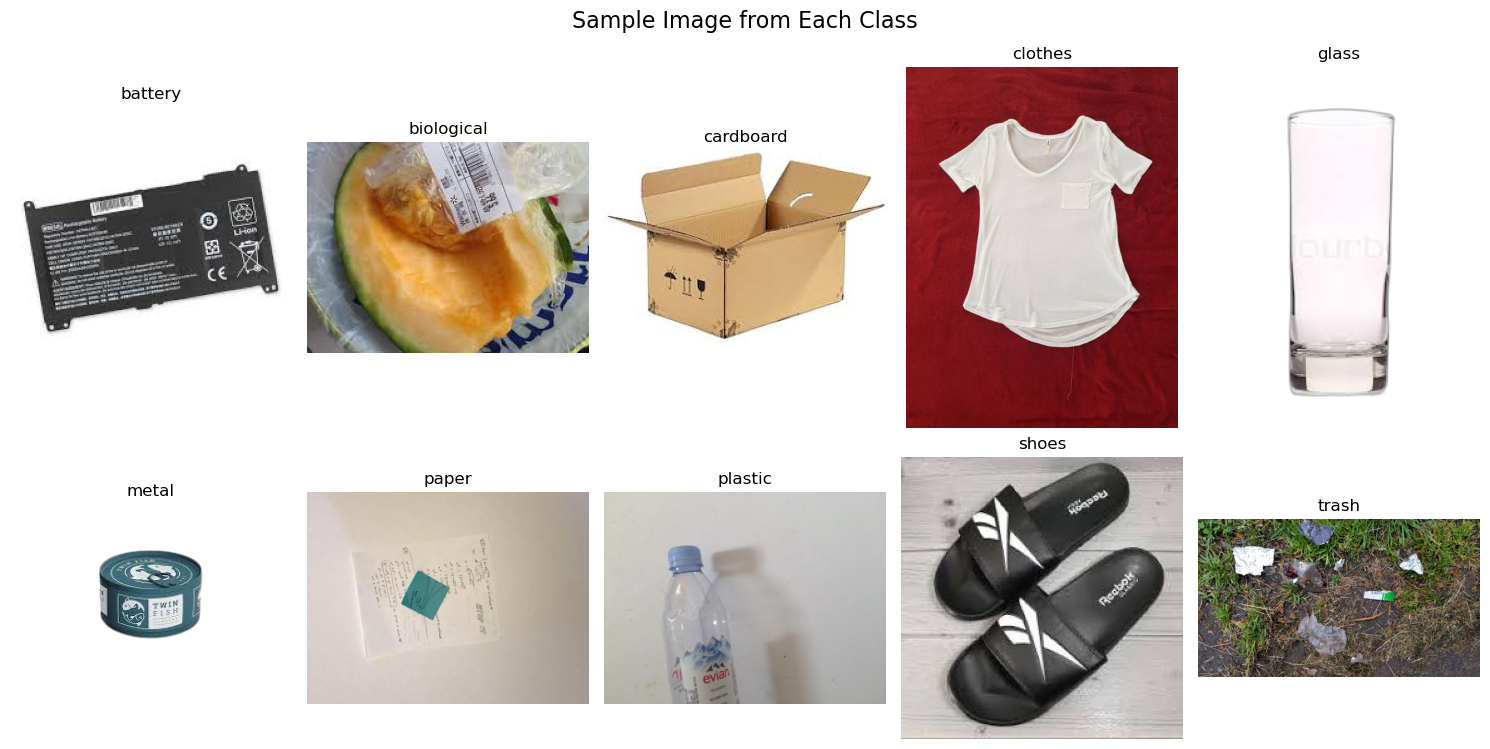

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Your dataset root folder
root_folder = '/Users/emmanuelgeorgep/Documents/College/HonoursProject/garbage-dataset'

# Get one image from each class
class_folders = sorted(os.listdir(root_folder))
sample_images = []

for class_name in class_folders:
    class_path = os.path.join(root_folder, class_name)
    if not os.path.isdir(class_path):
        continue
    # Find a valid image file
    for file in os.listdir(class_path):
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.webp')):
            sample_images.append((class_name, os.path.join(class_path, file)))
            break

# Plot images
plt.figure(figsize=(15, 8))
for i, (class_name, img_path) in enumerate(sample_images):
    img = Image.open(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.suptitle("Sample Image from Each Class", fontsize=16)
plt.tight_layout()
plt.show()

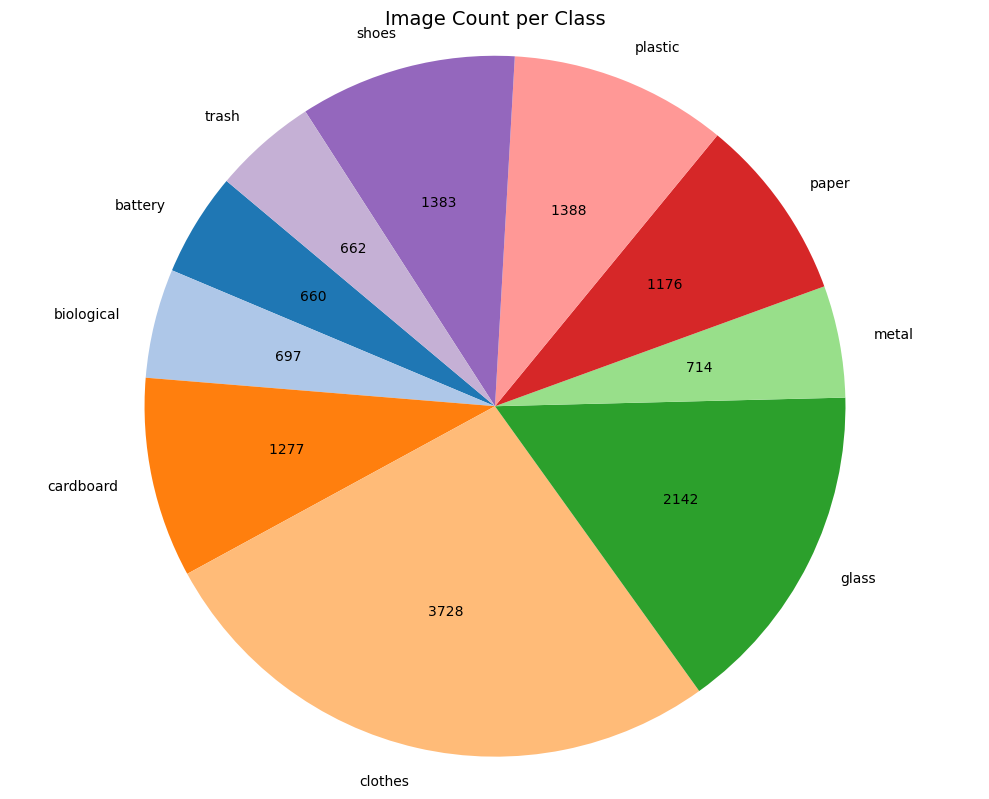

In [2]:
import os
import matplotlib.pyplot as plt

# Your dataset path
root_folder = '/Users/emmanuelgeorgep/Documents/College/HonoursProject/default_train'

# Count images in each class
class_counts = {}
for class_name in sorted(os.listdir(root_folder)):
    class_path = os.path.join(root_folder, class_name)
    if not os.path.isdir(class_path):
        continue
    count = len([
        f for f in os.listdir(class_path)
        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.webp'))
    ])
    class_counts[class_name] = count

# Function to display actual counts on pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{count} '
    return my_autopct

# Plotting the pie chart with counts
plt.figure(figsize=(10, 8))
plt.pie(
    class_counts.values(),
    labels=class_counts.keys(),
    autopct=make_autopct(list(class_counts.values())),
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title("Image Count per Class", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()